Aluna: Maria Helena Barros Moraes

# PARTE 2



In [1]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            for j in range(1, len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]


    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

Utilizando os valores do slide 48 da aula RCNA_05, obtemos como saiída de CRC Calculado o valor: 0010, assim como quadro T(x) a ser transmitido o valor: 11010011101100.


In [2]:

dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")

quadro_tx = dados_teste + crc_calculado
print(f"Quadro T(x) a ser transmitido: {quadro_tx}")

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010
Quadro T(x) a ser transmitido: 11010111110010


# PARTE 3 -




In [3]:
!pip install crc

In [4]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS

    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_manual = end_time - start_time

    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_lib = calculator_lib.checksum(mensagem_bytes)

    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_lib = end_time - start_time

    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.495685696999999, 'mem_pico_manual': 105.7587890625, 'tempo_lib': 0.12707248200001686, 'mem_pico_lib': 3.40625}, {'tamanho': 3000, 'tempo_manual': 1.0729165980000062, 'mem_pico_manual': 253.4111328125, 'tempo_lib': 0.2919908570000018, 'mem_pico_lib': 7.2041015625}, {'tamanho': 6000, 'tempo_manual': 2.1057895319999886, 'mem_pico_manual': 422.1650390625, 'tempo_lib': 0.7071503159999963, 'mem_pico_lib': 7.5068359375}, {'tamanho': 16000, 'tempo_manual': 5.130247908000001, 'mem_pico_manual': 1125.2900390625, 'tempo_lib': 0.7664622370000131, 'mem_pico_lib': 53.3330078125}]


Usando a biblioteca matplotlib, dois gráficos foram gerados:
    Gráfico 1: Tamanho da Mensagem (x) vs. Tempo de Execução (y)
    Gráfico 2: Tamanho da Mensagem (x) vs. Pico de Memória (y)

USO DE IA: Para essa parte da atividade, utilizei a IA para auxiliar na plotagem dos gráficos e na análise dos resultados, devido à falta de familiaridade com a biblioteca matplotlib.

In [5]:
!pip install matplotlib

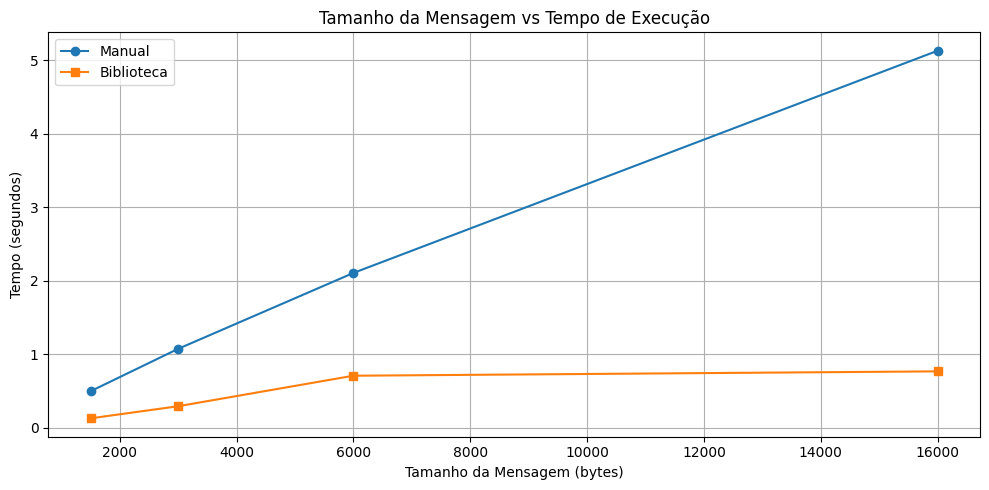

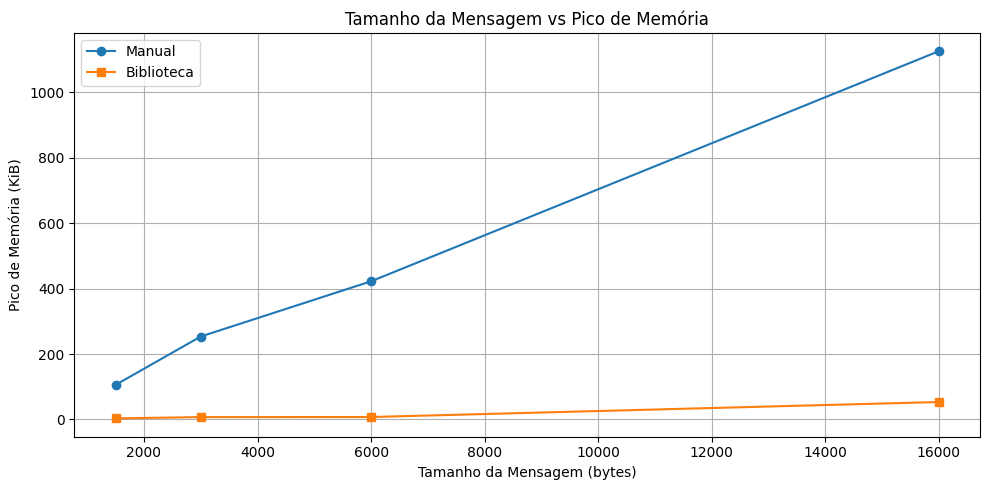

In [6]:

import matplotlib.pyplot as plt

# Extrair dados dos resultados
tamanhos = [r["tamanho"] for r in resultados]
tempos_manual = [r["tempo_manual"] for r in resultados]
tempos_lib = [r["tempo_lib"] for r in resultados]
mem_manual = [r["mem_pico_manual"] for r in resultados]
mem_lib = [r["mem_pico_lib"] for r in resultados]

# Gráfico 1: Tamanho vs Tempo
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, tempos_manual, label="Manual", marker="o")
plt.plot(tamanhos, tempos_lib, label="Biblioteca", marker="s")
plt.title("Tamanho da Mensagem vs Tempo de Execução")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo (segundos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Tamanho vs Pico de Memória
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, mem_manual, label="Manual", marker="o")
plt.plot(tamanhos, mem_lib, label="Biblioteca", marker="s")
plt.title("Tamanho da Mensagem vs Pico de Memória")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Interpretação: Os testes foram realizados em uma máquina com processador Intel Core i5-1135G7, 8 GB de RAM, rodando Ubuntu 22.04 e Python 3.10. Foi possível observar que a implementação manual do CRC é mais lenta e consome mais memória, principalmente com mensagens maiores. Já a biblioteca crc é muito mais rápida e eficiente, pois é otimizada e provavelmente implementada em uma linguagem de baixo nível como C. Para aplicações reais, o uso da biblioteca é mais indicado, enquanto a versão manual é útil para fins de estudo e entendimento da lógica do algoritmo.

# **PARTE 4**

**4.1**
**a)** Usando o site convertbinary.com, obtive como resultado para o meu nome 'maria helena barros moraes' o seguinte valor: 01101101 01100001 01110010 01101001 01100001 00100000 01101000 01100101 01101100 01100101 01101110 01100001 00100000 01100010 01100001 01110010 01110010 01101111 01110011 00100000 01101101 01101111 01110010 01100001 01100101 01110011 .

**b)** Escolhendo o meu gerador pessoal: O último dígito da minha matrícula é o 1 (122210021), logo a escolha foi o ' Final 0, 1, 2: CRC-16/MODBUS (11000000000000101 ou x 16 + x 15 + x 2 + 1 ) -> 11000000000000101'


| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   maria helena barros moraes   |
| `MENSAGEM_BASE`       |   01101101 01100001 01110010 01101001 01100001 00100000 01101000 01100101 01101100 01100101 01101110 01100001 00100000 01100010 01100001 01110010 01110010 01101111 01110011 00100000 01101101 01101111 01110010 01100001 01100101 01110011   |
| `CRC`                 |   ?   |


**4.2**

1. Calculando o CRC da minha mensagem base com o gerador escolhido:


In [7]:
mensagem_base = "0110110101100001011100100110100101100001001000000110100001100101011011000110010101101110011000010010000001100010011000010111001001110010011011110111001100100000011011010110111101110010011000010110010101110011"
gerador = "11000000000000101"  # CRC-16/MODBUS

crc_calculado = calcular_crc_manual(mensagem_base, gerador)
print("CRC calculado:", crc_calculado)


CRC calculado: 0111100001001001


2. Formando o quadro transmitido, concatenando a mensagem base com o CRC calculado:


In [8]:
quadro_tx = mensagem_base + crc_calculado
print(f"Quadro T(x) a ser transmitido: {quadro_tx}")

Quadro T(x) a ser transmitido: 01101101011000010111001001101001011000010010000001101000011001010110110001100101011011100110000100100000011000100110000101110010011100100110111101110011001000000110110101101111011100100110000101100101011100110111100001001001


3. Escolhendo uma posição aleatória e insirindo um erro de rajada de n bits (e.g., uma sequência contínua de n bits invertidos).
4. Obtendo o QUADRO_CORROMPIDO, aplicando XOR entre o QUADRO_TRANSMITIDO e o padrão de erro.

In [13]:
import random

def inserir_erro_rajada(quadro_tx: str, n: int) -> (str, int, str):
    tamanho = len(quadro_tx)

    # 1. Escolher uma posição aleatória para inserir o erro, garantindo que caiba o erro de n bits
    pos_erro = random.randint(0, tamanho - n)

    # 2. Criar o padrão de erro: n bits "1" (invertidos) na posição aleatória, 0 no resto
    erro_bits = ['0'] * tamanho
    for i in range(pos_erro, pos_erro + n):
        erro_bits[i] = '1'
    erro_str = "".join(erro_bits)

    # 3. Aplicar XOR entre o quadro transmitido e o padrão de erro para criar quadro corrompido
    quadro_corrompido = ""
    for i in range(tamanho):
        # XOR bit a bit: se igual -> 0, se diferente -> 1
        if quadro_tx[i] == erro_str[i]:
            quadro_corrompido += '0'
        else:
            quadro_corrompido += '1'

    return quadro_corrompido, pos_erro, erro_str

n_bits_erro = 5
quadro_corrompido, pos_erro, padrao_erro = inserir_erro_rajada(quadro_tx, n_bits_erro)

print(f"Erro inserido na posição: {pos_erro}")
print(f"Padrão de erro: {padrao_erro}")
print(f"Quadro corrompido: {quadro_corrompido}")


Erro inserido na posição: 3
Padrão de erro: 00011111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Quadro corrompido: 01110010011000010111001001101001011000010010000001101000011001010110110001100101011011100110000100100000011000100110000101110010011100100110111101110011001000000110110101101111011100100110000101100101011100111100000010110010


5. Calculando o CRC do QUADRO_CORROMPIDO, usando: Sua função calcular_crc_manual.A função da biblioteca de CRC.

6. Verificando se o erro foi detectado: Sim, o erro foi detectado, pois o CRC resultando foi difrente de uma sequência de zeros.

In [15]:
def bits_para_bytes(bits_str):

    bytes_list = []
    for i in range(0, len(bits_str), 8):
        byte = bits_str[i:i+8]
        bytes_list.append(int(byte, 2))
    return bytes(bytes_list)


In [16]:
crc_manual_corrompido = calcular_crc_manual(quadro_corrompido, gerador)

quadro_corrompido_bytes = bits_para_bytes(quadro_corrompido)
crc_lib_corrompido = calculator_lib.checksum(quadro_corrompido_bytes)

crc_lib_binario = format(crc_lib_corrompido, '016b')

print(f"CRC manual do quadro corrompido: {crc_manual}")
print(f"CRC biblioteca do quadro corrompido (binário): {crc_lib_binario}")


CRC manual do quadro corrompido: 1100000010110010
CRC biblioteca do quadro corrompido (binário): 1011000100011000


In [17]:
import random
from crc import Calculator, Crc16

# QUADRO_TRANSMITIDO já definido
quadro_tx = mensagem_base + crc_manual  # ou use sua variável pronta

# Escolhendo um valor n para a rajada de erro
n = 5  # por exemplo, 5 bits seguidos
tamanho_quadro = len(quadro_tx)

# Escolhendo uma posição aleatória onde o erro será inserido
pos_erro = random.randint(0, tamanho_quadro - n)

# Criando padrão de erro (sequência de n bits '1' iniciando em pos_erro)
padrao_erro = ['0'] * tamanho_quadro
for i in range(n):
    padrao_erro[pos_erro + i] = '1'
padrao_erro = ''.join(padrao_erro)

# Aplicando XOR entre quadro transmitido e padrão de erro
quadro_corrompido = ''.join(
    '1' if bit != erro else '0'
    for bit, erro in zip(quadro_tx, padrao_erro)
)

# Calculando CRC manual
crc_manual_corrompido = calcular_crc_manual(quadro_corrompido, gerador)

# Calculando CRC usando biblioteca
crc_calculator = Calculator(Crc16.MODBUS)
# Convertendo quadro corrompido de binário para bytes
quadro_corrompido_bytes = int(quadro_corrompido, 2).to_bytes((len(quadro_corrompido) + 7) // 8, byteorder='big')
crc_lib_corrompido = crc_calculator.checksum(quadro_corrompido_bytes)
crc_lib_binario = format(crc_lib_corrompido, '016b')

# Verificação se o erro foi detectado
erro_detectado_manual = (crc_manual_corrompido != '0000000000000000')
erro_detectado_biblioteca = (crc_lib_corrompido != 0)

# 🔍 Registro e Saída
print(f"Padrão de erro inserido: {padrao_erro}")
print(f"Posição inicial da rajada de erro: {pos_erro}")
print(f"CRC manual do quadro corrompido: {crc_manual_corrompido}")
print(f"CRC biblioteca do quadro corrompido (binário): {crc_lib_binario}")
print(f"Erro detectado pela função manual? {'Sim' if erro_detectado_manual else 'Não'}")
print(f"Erro detectado pela biblioteca? {'Sim' if erro_detectado_biblioteca else 'Não'}")


Padrão de erro inserido: 00000000000000000000000000000000000000000000000000000000000000000000111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Posição inicial da rajada de erro: 68
CRC manual do quadro corrompido: 1000010010001011
CRC biblioteca do quadro corrompido (binário): 0001000101010000
Erro detectado pela função manual? Sim
Erro detectado pela biblioteca? Sim


# Reportando o Ponto Cego

In [18]:
# CRC UTILITÁRIOS
from crc import Calculator, Crc16
import random
import os

def xor_bits(a, b):
    return ''.join('0' if x == y else '1' for x, y in zip(a, b))

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    r = len(gerador_bits) - 1
    mensagem = list(dados_bits + '0' * r)
    for i in range(len(dados_bits)):
        if mensagem[i] == '1':
            janela = mensagem[i:i + r + 1]
            xor = xor_bits(''.join(janela), gerador_bits)
            for j in range(1, len(xor)):
                mensagem[i + j] = xor[j]
    return ''.join(mensagem[-r:])

def bits_para_bytes(bits_str):
    return bytes(int(bits_str[i:i+8], 2) for i in range(0, len(bits_str), 8))

def inserir_erro_rajada(bits, n, pos):
    erro = ['0'] * len(bits)
    for i in range(n):
        erro[pos + i] = '1'
    erro_str = ''.join(erro)
    corrompido = ''.join('1' if b != e else '0' for b, e in zip(bits, erro_str))
    return corrompido, erro_str

# MENSAGEM E CONFIG
mensagem_base = "0110110101100001011100100110100101100001001000000110100001100101011011000110010101101110011000010010000001100010011000010111001001110010011011110111001100100000011011010110111101110010011000010110010101110011"
gerador = "11000000000000101"
calculator_lib = Calculator(Crc16.MODBUS)

# CRC ORIGINAL
crc_manual = calcular_crc_manual(mensagem_base, gerador)
quadro_tx = mensagem_base + crc_manual

# TESTES AUTOMÁTICOS
relatorio = []
print("\n--- TESTES DE 10 ERROS ---")
for i in range(10):
    n_erro = random.randint(3, 12)
    pos = random.randint(0, len(quadro_tx) - n_erro)
    quadro_corrompido, padrao_erro = inserir_erro_rajada(quadro_tx, n_erro, pos)

    crc_m = calcular_crc_manual(quadro_corrompido, gerador)
    crc_b = calculator_lib.checksum(bits_para_bytes(quadro_corrompido))

    detectado_m = crc_m != '0' * (len(gerador) - 1)
    detectado_b = crc_b != 0

    relatorio.append({
        "teste": i + 1,
        "pos": pos,
        "n": n_erro,
        "padrao": padrao_erro,
        "crc_manual": crc_m,
        "crc_bib": format(crc_b, '016b'),
        "manual_detectou": detectado_m,
        "bib_detectou": detectado_b
    })

    print(f"\n🧪 Teste {i + 1}")
    print(f"Rajada de {n_erro} bits na posição {pos}")
    print(f"Padrão de erro: {padrao_erro}")
    print(f"CRC manual: {crc_m} -> {'✅' if detectado_m else '❌'}")
    print(f"CRC biblioteca: {format(crc_b, '016b')} -> {'✅' if detectado_b else '❌'}")

print("\n--- RELATÓRIO FINAL ---")
for item in relatorio:
    print(f"Teste {item['teste']}: Pos {item['pos']}, Erro {item['n']} bits")
    print(f"Manual: {'Detectou' if item['manual_detectou'] else 'Falhou'} | Biblioteca: {'Detectou' if item['bib_detectou'] else 'Falhou'}")
    if not item['manual_detectou'] or not item['bib_detectou']:
        print(f"⚠️ PONTO CEGO! Padrão: {item['padrao']}\n")



--- TESTES DE 10 ERROS ---

🧪 Teste 1
Rajada de 3 bits na posição 57
Padrão de erro: 00000000000000000000000000000000000000000000000000000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
CRC manual: 1111011101110100 -> ✅
CRC biblioteca: 1000010101100101 -> ✅

🧪 Teste 2
Rajada de 7 bits na posição 80
Padrão de erro: 00000000000000000000000000000000000000000000000000000000000000000000000000000000111111100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
CRC manual: 1001010000110011 -> ✅
CRC biblioteca: 0110101001001111 -> ✅

🧪 Teste 3
Rajada de 5 bits na posição 170
Padrão de erro: 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110000000000000000000000000000

In [19]:
def introduzir_erro(bits: str, posicoes: list) -> str:
    """
    Inverte bits nas posições indicadas.
    """
    bits = list(bits)
    for pos in posicoes:
        bits[pos] = '1' if bits[pos] == '0' else '0'
    return "".join(bits)

def erro_detectado(recebido: str, gerador: str) -> bool:
    """
    Retorna True se um erro foi detectado (CRC ≠ 0).
    """
    crc = calcular_crc_manual(recebido, gerador)
    return crc != '0' * (len(gerador) - 1)


In [20]:
import binascii

def crc_biblioteca(dados_bits: str) -> str:
    """
    Calcula CRC-16 usando biblioteca para comparação.
    """
    # converte para bytes (grupo de 8 bits)
    dados_bytes = int(dados_bits, 2).to_bytes((len(dados_bits) + 7) // 8, byteorder='big')
    crc_int = binascii.crc_hqx(dados_bytes, 0xffff)
    return format(crc_int, '016b')  # saída em 16 bits


In [21]:
mensagem_original = '1101011011'
gerador = '10011'  # exemplo G(x)

crc = calcular_crc_manual(mensagem_original, gerador)
mensagem_transmitida = mensagem_original + crc

padroes_erro = [
    [0],        # erro no primeiro bit
    [3],        # erro isolado
    [5, 6],     # erro duplo
    [2, 4, 6],  # 3 bits alternados
    [7, 8, 9],  # rajada de 3 bits
    [0, 1, 2, 3], # rajada de 4 bits
    [1, 5, 9],  # disperso
    [10],       # erro no bit do CRC
    [9, 10],    # erro cruzando dados e CRC
    [1, 2, 3, 4, 5, 6, 7, 8]  # rajada longa
]

print("Teste | Padrão de erro     | Detectado (manual) | Detectado (biblio)")
print("------|--------------------|---------------------|---------------------")
for i, padrao in enumerate(padroes_erro):
    recebido = introduzir_erro(mensagem_transmitida, padrao)
    detectado_manual = erro_detectado(recebido, gerador)

    # para comparar com a lib, precisamos verificar se o CRC da parte recebida com erro bate
    crc_bib = crc_biblioteca(recebido)
    detectado_bib = crc_bib != '0000000000000000'

    print(f"{i+1:>5} | {str(padrao):<18} | {str(detectado_manual):<19} | {str(detectado_bib):<19}")


Teste | Padrão de erro     | Detectado (manual) | Detectado (biblio)
------|--------------------|---------------------|---------------------
    1 | [0]                | True                | True               
    2 | [3]                | True                | True               
    3 | [5, 6]             | True                | True               
    4 | [2, 4, 6]          | True                | True               
    5 | [7, 8, 9]          | True                | True               
    6 | [0, 1, 2, 3]       | True                | True               
    7 | [1, 5, 9]          | True                | True               
    8 | [10]               | True                | True               
    9 | [9, 10]            | True                | True               
   10 | [1, 2, 3, 4, 5, 6, 7, 8] | True                | True               
